# Neighborhood Change

Variables of interest:
- Income 

Geographic unit of analysis:
- tract

Task 

**ACS dataset**

1. Filter GEOID to California 

2. Keep variable that represents income 

**Tract boundaries**

1. import data from tl_2018_06_tract folder and get the file that ends with .shp

2. check and set CRS to 2230 

**Merge tract and acs income variables by GEOID**
1. dataset produced is tract_income

**Import School Boundaries from quilt**
1. nces/sabs/sabs_1516.parquet

2. clean to CA school boundaries and level = 1 (elementary) 

**Spatial Join**
1. sjoin of school boundaries and tract_income level data

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
import quilt3
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("census/acs/acs_2018_tract.parquet", "./acs_2018_tract.parquet")

100%|██████████| 575M/575M [00:06<00:00, 85.1MB/s]  


In [2]:
acs = gpd.read_parquet('./acs_2018_tract.parquet')

acs.head()

,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,n_recent_immigrant_pop,...,p_veterans,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
02020001300,83.0,9.0,0.0,10.0,13.0,177.0,73.0,0.0,178.0,49.0,...,6.715702,3.952057,0.000000,0.000000,3.952057,0.000000,1.068999,0.000000,0.000000,"MULTIPOLYGON (((-149.98205 61.22613, -149.9676..."
02020001400,182.0,0.0,123.0,2.0,17.0,249.0,45.0,45.0,871.0,296.0,...,7.132950,18.109294,0.039888,2.951735,3.749501,12.584763,0.518548,1.196649,0.000000,"MULTIPOLYGON (((-149.91326 61.19631, -149.9132..."
02020001500,206.0,0.0,0.0,14.0,44.0,99.0,90.0,34.0,744.0,383.0,...,7.089829,5.586802,0.712411,0.000000,3.355831,0.000000,0.806149,0.712411,0.000000,"MULTIPOLYGON (((-149.86817 61.19528, -149.8681..."
02020001601,254.0,0.0,22.0,0.0,8.0,134.0,76.0,0.0,481.0,100.0,...,4.066042,4.160363,0.579929,0.176500,1.487645,0.277358,0.403429,0.327786,0.554715,"MULTIPOLYGON (((-149.83828 61.20771, -149.8380..."
02020001602,173.0,0.0,2.0,14.0,0.0,185.0,113.0,7.0,388.0,95.0,...,10.044944,5.344089,0.504159,0.403327,1.890597,0.680615,0.000000,0.932695,0.000000,"MULTIPOLYGON (((-149.83826 61.19537, -149.8377..."


In [3]:
acs.columns

# GEOID is not a column but the index

Index(['n_mexican_pop', 'n_cuban_pop', 'n_puerto_rican_pop', 'n_russian_pop',
       'n_italian_pop', 'n_german_pop', 'n_irish_pop', 'n_scandaniavian_pop',
       'n_foreign_born_pop', 'n_recent_immigrant_pop',
       ...
       'p_veterans', 'p_poverty_rate', 'p_poverty_rate_over_65',
       'p_poverty_rate_children', 'p_poverty_rate_white',
       'p_poverty_rate_black', 'p_poverty_rate_hispanic',
       'p_poverty_rate_native', 'p_poverty_rate_asian', 'geometry'],
      dtype='object', length=155)

In [4]:
acs = acs.reset_index()

# before GEOID is in the index, by resetting the index it turns GEOID into a column

In [5]:
acs.columns

# GEOID is now apart of the columns

Index(['GEOID', 'n_mexican_pop', 'n_cuban_pop', 'n_puerto_rican_pop',
       'n_russian_pop', 'n_italian_pop', 'n_german_pop', 'n_irish_pop',
       'n_scandaniavian_pop', 'n_foreign_born_pop',
       ...
       'p_veterans', 'p_poverty_rate', 'p_poverty_rate_over_65',
       'p_poverty_rate_children', 'p_poverty_rate_white',
       'p_poverty_rate_black', 'p_poverty_rate_hispanic',
       'p_poverty_rate_native', 'p_poverty_rate_asian', 'geometry'],
      dtype='object', length=156)

In [6]:
ca_acs = acs[acs.GEOID.str.startswith('06')]

#filter acs dataset by the column GEOID by the row values that starts with 06

In [7]:
ca_acs.head()

,GEOID,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_veterans,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry
3560,06037554001,1718.0,0.0,34.0,0.0,32.0,267.0,39.0,0.0,987.0,...,5.762338,12.131238,0.634133,2.371106,5.596912,0.275710,10.862972,0.000000,0.0,"MULTIPOLYGON (((-118.14073 33.89670, -118.1397..."
3561,06037554002,2872.0,63.0,0.0,0.0,27.0,0.0,0.0,0.0,2175.0,...,1.266473,13.695578,0.548509,2.005485,6.102160,2.125471,7.576277,0.000000,0.0,"MULTIPOLYGON (((-118.14279 33.89649, -118.1426..."
3562,06037554101,2486.0,0.0,17.0,0.0,8.0,10.0,0.0,0.0,1448.0,...,2.134063,22.051984,0.601915,3.556772,3.091655,1.723666,18.002736,0.218878,0.0,"MULTIPOLYGON (((-118.12531 33.90038, -118.1251..."
3563,06037554103,750.0,10.0,6.0,4.0,0.0,11.0,13.0,0.0,541.0,...,1.444517,8.486842,0.657895,0.921053,1.710526,0.000000,6.118421,0.000000,0.0,"MULTIPOLYGON (((-118.12532 33.90200, -118.1250..."
3564,06037554104,1303.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,918.0,...,1.157685,23.281062,2.010454,3.136309,5.106554,1.367109,17.571371,0.000000,0.0,"MULTIPOLYGON (((-118.12203 33.89663, -118.1216..."


In [8]:
ca_acs.columns

Index(['GEOID', 'n_mexican_pop', 'n_cuban_pop', 'n_puerto_rican_pop',
       'n_russian_pop', 'n_italian_pop', 'n_german_pop', 'n_irish_pop',
       'n_scandaniavian_pop', 'n_foreign_born_pop',
       ...
       'p_veterans', 'p_poverty_rate', 'p_poverty_rate_over_65',
       'p_poverty_rate_children', 'p_poverty_rate_white',
       'p_poverty_rate_black', 'p_poverty_rate_hispanic',
       'p_poverty_rate_native', 'p_poverty_rate_asian', 'geometry'],
      dtype='object', length=156)

In [9]:
ca_acs.median_household_income.unique()

array([55703., 56452., 42969., ..., 69159., 83194., 45434.])

In [10]:
income = ca_acs[['GEOID','median_household_income','median_home_value','per_capita_income']]

In [11]:
income.head()

,GEOID,median_household_income,median_home_value,per_capita_income
3560,06037554001,55703.0,450200.0,23331.0
3561,06037554002,56452.0,461200.0,22520.0
3562,06037554101,42969.0,453200.0,19127.0
3563,06037554103,81480.0,460200.0,34880.0
3564,06037554104,63625.0,464800.0,20344.0


# Import tract level data for geometries

In [12]:
tract = gpd.read_file('./tl_2018_06_tract/tl_2018_06_tract.shp')

#right click the shapefile > copy path > PBPL280S21Project1/tl_2018_06_tract/tl_2018_06_tract.shp

In [13]:
tract.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,137504,06037137504,1375.04,Census Tract 1375.04,G5020,S,3837562,0,+34.1480383,-118.5720594,"POLYGON ((-118.58119 34.14318, -118.58099 34.1..."
1,06,037,138000,06037138000,1380,Census Tract 1380,G5020,S,4472196,0,+34.1488008,-118.5910495,"POLYGON ((-118.60573 34.14585, -118.60561 34.1..."
2,06,037,139200,06037139200,1392,Census Tract 1392,G5020,S,1152031,0,+34.1756961,-118.5246447,"POLYGON ((-118.53082 34.18024, -118.52952 34.1..."
3,06,067,002300,06067002300,23,Census Tract 23,G5020,S,1213095,0,+38.5571708,-121.4938311,"POLYGON ((-121.50218 38.55643, -121.50184 38.5..."
4,06,067,002400,06067002400,24,Census Tract 24,G5020,S,3224718,0,+38.5448312,-121.4973382,"POLYGON ((-121.50970 38.54070, -121.50960 38.5..."


In [14]:
tract.shape

(8057, 13)

In [15]:
tract.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
tract = tract.to_crs(2230)

# merge the neighborhood variables income to get a dataset with the income variables, geoids, and geometries

In [17]:
type(tract)

geopandas.geodataframe.GeoDataFrame

In [18]:
type(income)

# need to check to see if both dataframes are geodataframes if not we convert them to a geodataframe

pandas.core.frame.DataFrame

In [19]:
income = gpd.GeoDataFrame(income)

#convert pandas dataframe into a geodataframe with this code

In [20]:
tract_income = income.merge(tract, how='left', on='GEOID')

In [21]:
tract_income

,GEOID,median_household_income,median_home_value,per_capita_income,STATEFP,COUNTYFP,TRACTCE,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06037554001,55703.0,450200.0,23331.0,06,037,554001,5540.01,Census Tract 5540.01,G5020,S,1082739,0,+33.8990638,-118.1322329,"POLYGON ((5987925.784 2275112.258, 5988249.105..."
1,06037554002,56452.0,461200.0,22520.0,06,037,554002,5540.02,Census Tract 5540.02,G5020,S,1269668,0,+33.8922721,-118.1336322,"POLYGON ((5987299.089 2275049.015, 5987348.882..."
2,06037554101,42969.0,453200.0,19127.0,06,037,554101,5541.01,Census Tract 5541.01,G5020,S,473914,0,+33.8928105,-118.1236012,"POLYGON ((5992628.264 2276367.468, 5992690.382..."
3,06037554103,81480.0,460200.0,34880.0,06,037,554103,5541.03,Census Tract 5541.03,G5020,S,368572,0,+33.8996980,-118.1201748,"POLYGON ((5992635.820 2276956.239, 5992710.707..."
4,06037554104,63625.0,464800.0,20344.0,06,037,554104,5541.04,Census Tract 5541.04,G5020,S,364478,0,+33.8931415,-118.1195565,"POLYGON ((5993599.563 2274986.574, 5993703.488..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06115040800,69159.0,254500.0,32816.0,06,115,040800,408,Census Tract 408,G5020,S,109401416,128316,+39.0410532,-121.4339803,"POLYGON ((5058959.284 4180341.579, 5059024.590..."
8053,06115040901,57969.0,205000.0,25904.0,06,115,040901,409.01,Census Tract 409.01,G5020,S,263652570,4473094,+39.1397434,-121.5823399,"POLYGON ((5041586.069 4219922.530, 5041642.867..."
8054,06115040902,45250.0,NaN,19183.0,06,115,040902,409.02,Census Tract 409.02,G5020,S,93617079,240059,+39.1191804,-121.3995270,"POLYGON ((5071766.110 4217339.958, 5071993.551..."
8055,06115041000,83194.0,327200.0,39049.0,06,115,041000,410,Census Tract 410,G5020,S,468397390,6927408,+39.2661888,-121.4453728,"POLYGON ((5028575.474 4260876.310, 5028615.848..."


In [22]:
tract_income.columns

Index(['GEOID', 'median_household_income', 'median_home_value',
       'per_capita_income', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'geometry'],
      dtype='object')

In [23]:
tract_income = tract_income[['GEOID','median_household_income','median_home_value','per_capita_income','geometry']]

In [24]:
tract_income

,GEOID,median_household_income,median_home_value,per_capita_income,geometry
0,06037554001,55703.0,450200.0,23331.0,"POLYGON ((5987925.784 2275112.258, 5988249.105..."
1,06037554002,56452.0,461200.0,22520.0,"POLYGON ((5987299.089 2275049.015, 5987348.882..."
2,06037554101,42969.0,453200.0,19127.0,"POLYGON ((5992628.264 2276367.468, 5992690.382..."
3,06037554103,81480.0,460200.0,34880.0,"POLYGON ((5992635.820 2276956.239, 5992710.707..."
4,06037554104,63625.0,464800.0,20344.0,"POLYGON ((5993599.563 2274986.574, 5993703.488..."
...,...,...,...,...,...
8052,06115040800,69159.0,254500.0,32816.0,"POLYGON ((5058959.284 4180341.579, 5059024.590..."
8053,06115040901,57969.0,205000.0,25904.0,"POLYGON ((5041586.069 4219922.530, 5041642.867..."
8054,06115040902,45250.0,NaN,19183.0,"POLYGON ((5071766.110 4217339.958, 5071993.551..."
8055,06115041000,83194.0,327200.0,39049.0,"POLYGON ((5028575.474 4260876.310, 5028615.848..."


In [25]:
tract_income.median_household_income.unique()

array([55703., 56452., 42969., ..., 69159., 83194., 45434.])

In [26]:
tract_income.median_home_value.unique()

#need to clean the NaN in the dataset, but it doesnt show up here?

array([450200., 461200., 453200., ..., 277200., 254500., 205500.])

<AxesSubplot:>

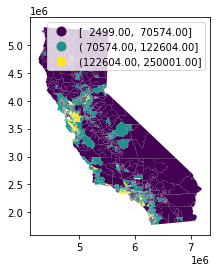

In [27]:
tract_income.plot(column='median_household_income', scheme='FisherJenks', k=3, legend=True)

# CRS

In [28]:
tract_income_copy = tract_income.copy()

In [29]:
tract_income_copy.crs = "EPSG:2230"

# https://stackoverflow.com/questions/64421284/geopandas-valueerror-cannot-transform-naive-geometries-please-set-a-crs-on-t

In [30]:
#tract_income_copy = tract_income_copy.crs(epsg=2230)

In [31]:
tract_income_copy.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - California - SPCS - 6
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Import school district boundaries

In [28]:
import quilt3
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("nces/sabs/sabs_1516.parquet", "./sabs_1516.parquet")

100%|██████████| 241M/241M [00:04<00:00, 48.5MB/s] 


In [32]:
sabs = gpd.read_parquet('./sabs_1516.parquet')

sabs.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
0,None,010000500870,Ala Avenue Middle Sch,0100005,07,08,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
1,None,010000500871,Albertville High Sch,0100005,09,12,1,AL,0,146828.793028,1.012552e+08,3,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
2,None,010000500879,Evans Elem Sch,0100005,05,06,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
3,None,010000500889,Albertville Elem Sch,0100005,03,04,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
4,None,010000501616,Big Spring Lake Kinderg Sch,0100005,KG,KG,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."


In [33]:
sabs = sabs[sabs['stAbbrev'] == 'CA']

In [34]:
sabs

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
3792,Vasquez High,060000103278,Vasquez High,0600001,09,12,0,CA,0,133901.224937,8.089787e+08,3,0,"POLYGON ((-13162468.047 4103989.263, -13161303..."
3793,Meadowlark Elementary,060000107534,Meadowlark Elementary,0600001,KG,05,0,CA,0,98640.270744,4.097022e+08,1,0,"POLYGON ((-13156328.553 4104009.539, -13156326..."
3794,High Desert,060000109444,High Desert,0600001,06,08,0,CA,0,133901.224937,8.089787e+08,2,0,"POLYGON ((-13162468.047 4103989.263, -13161303..."
3795,Not provided,060000199991,Unassigned,0600001,KG,05,0,CA,0,12587.404553,9.853027e+06,1,0,"POLYGON ((-13171958.590 4087695.227, -13172297..."
3796,Not provided,060000199992,Unassigned,0600001,06,08,0,CA,0,12587.404553,9.853027e+06,2,0,"POLYGON ((-13171958.590 4087695.227, -13172297..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11374,May Ranch ES,069113512262,May Ranch Elementary,0691135,KG,05,0,CA,0,25567.027066,2.040861e+07,1,0,"POLYGON ((-13052782.727 4011378.522, -13052465..."
11375,None,069113513435,El Potrero Pre-School,0691135,N,N,0,CA,1,78933.485082,2.190421e+08,N,0,"POLYGON ((-13049569.352 4015038.339, -13049569..."
11376,None,069113710339,Tioga High,0691137,09,12,0,CA,2,512279.958807,2.745537e+09,3,0,"POLYGON ((-13409757.024 4542122.022, -13409750..."
11377,None,069113710340,Don Pedro High,0691137,09,12,0,CA,2,512279.958807,2.745537e+09,3,0,"POLYGON ((-13409757.024 4542122.022, -13409750..."


In [35]:
sabs = sabs[sabs['level']=='1']

In [36]:
sabs

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
3793,Meadowlark Elementary,060000107534,Meadowlark Elementary,0600001,KG,05,0,CA,0,98640.270744,4.097022e+08,1,0,"POLYGON ((-13156328.553 4104009.539, -13156326..."
3795,Not provided,060000199991,Unassigned,0600001,KG,05,0,CA,0,12587.404553,9.853027e+06,1,0,"POLYGON ((-13171958.590 4087695.227, -13172297..."
3798,Manor Elementary,060000608773,Manor Elementary,0600006,KG,05,0,CA,0,22171.227927,2.137842e+07,1,0,"POLYGON ((-13647029.735 4574822.670, -13647029..."
3800,Brookside Elementary,060000608775,Brookside Elementary,0600006,KG,05,0,CA,0,10318.549375,3.491899e+06,1,0,"POLYGON ((-13644473.542 4577056.191, -13644504..."
3801,Wade Thomas Elementary,060000608776,Wade Thomas Elementary,0600006,KG,05,0,CA,0,13021.540804,6.420270e+06,1,0,"POLYGON ((-13642827.230 4577040.000, -13642819..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11369,Avalon ES,069113511049,Avalon Elementary,0691135,KG,05,0,CA,0,8183.489941,1.829291e+06,1,0,"POLYGON ((-13044305.073 4006030.891, -13044466..."
11370,Sierra Vista ES,069113511232,Sierra Vista Elementary,0691135,KG,06,0,CA,0,24008.866755,1.363372e+07,1,0,"POLYGON ((-13041769.750 4005716.798, -13041779..."
11372,Triple Crown ES,069113511724,Triple Crown Elementary,0691135,KG,05,0,CA,0,7760.996787,3.780097e+06,1,0,"POLYGON ((-13046640.312 4004089.170, -13046637..."
11374,May Ranch ES,069113512262,May Ranch Elementary,0691135,KG,05,0,CA,0,25567.027066,2.040861e+07,1,0,"POLYGON ((-13052782.727 4011378.522, -13052465..."


# CRS

In [37]:
sabs.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
sabs = sabs.to_crs(2230)

In [39]:
test = gpd.sjoin(sabs, tract_income_copy, how='inner', op='intersects')

In [40]:
test.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry,index_right,GEOID,median_household_income,median_home_value,per_capita_income
3793,Meadowlark Elementary,060000107534,Meadowlark Elementary,0600001,KG,05,0,CA,0,98640.270744,4.097022e+08,1,0,"POLYGON ((5978868.095 2516098.041, 5978871.558...",51,06037930301,75313.0,310300.0,25714.0
3856,Magnolia,060001609091,Magnolia Elementary,0600016,KG,06,0,CA,0,46604.692278,4.122824e+07,1,0,"MULTIPOLYGON (((6137548.124 2359391.704, 61375...",51,06037930301,75313.0,310300.0,25714.0
4574,Not provided,060360099991,Unassigned,0603600,KG,05,0,CA,0,133960.676413,5.342097e+08,1,0,"MULTIPOLYGON (((6138847.262 2433711.880, 61388...",51,06037930301,75313.0,310300.0,25714.0
4810,Shull Elementary School,060561000504,Arma J. Shull Elementary,0605610,KG,05,0,CA,0,50793.475866,5.025219e+07,1,0,"MULTIPOLYGON (((6099786.541 2363744.073, 60997...",51,06037930301,75313.0,310300.0,25714.0
4820,Oak Mesa Elementary,060561010235,Oak Mesa Elementary,0605610,KG,05,0,CA,0,34831.951495,4.352192e+07,1,0,"POLYGON ((6108019.858 2378382.456, 6107993.618...",51,06037930301,75313.0,310300.0,25714.0


In [41]:
test.shape

(39505, 19)

In [42]:
riverside = test[test.GEOID.str.startswith('06065')]

# filter the GEOID column to riverside only

In [43]:
riverside

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry,index_right,GEOID,median_household_income,median_home_value,per_capita_income
3924,Tuscany Hills ES,060002702451,Tuscany Hills Elementary,0600027,KG,05,0,CA,0,24718.990388,1.314803e+07,1,0,"POLYGON ((6262026.528 2192370.515, 6261419.257...",7837,06065042714,96731.0,429800.0,53632.0
3934,Railroad Canyon ES,060002709497,Railroad Canyon Elementary,0600027,KG,05,0,CA,0,20376.855762,1.188319e+07,1,0,"POLYGON ((6238401.187 2189656.390, 6239065.130...",7837,06065042714,96731.0,429800.0,53632.0
3939,Cottonwood Canyon ES,060002710587,Cottonwood Canyon Elementary,0600027,KG,05,0,CA,0,26619.806978,2.010240e+07,1,0,"POLYGON ((6252808.166 2193059.835, 6252995.335...",7837,06065042714,96731.0,429800.0,53632.0
8127,Herk Bouris Elementary,062454013172,Herk Bouris Elementary,0624540,KG,05,0,CA,0,37708.008745,5.374639e+07,1,0,"POLYGON ((6276057.731 2188869.958, 6276057.272...",7837,06065042714,96731.0,429800.0,53632.0
3924,Tuscany Hills ES,060002702451,Tuscany Hills Elementary,0600027,KG,05,0,CA,0,24718.990388,1.314803e+07,1,0,"POLYGON ((6262026.528 2192370.515, 6261419.257...",7839,06065042716,91656.0,425300.0,40016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11374,May Ranch ES,069113512262,May Ranch Elementary,0691135,KG,05,0,CA,0,25567.027066,2.040861e+07,1,0,"POLYGON ((6256551.552 2261717.715, 6257403.740...",6716,06065048300,81111.0,287400.0,23109.0
11368,Lasselle ES,069113511048,Lasselle Elementary,0691135,KG,05,0,CA,0,34648.831338,3.359791e+07,1,0,"POLYGON ((6274594.936 2268886.135, 6274377.061...",7730,06065042619,70034.0,281600.0,19122.0
11369,Avalon ES,069113511049,Avalon Elementary,0691135,KG,05,0,CA,0,8183.489941,1.829291e+06,1,0,"POLYGON ((6279539.050 2246985.477, 6279099.362...",7730,06065042619,70034.0,281600.0,19122.0
11370,Sierra Vista ES,069113511232,Sierra Vista Elementary,0691135,KG,06,0,CA,0,24008.866755,1.363372e+07,1,0,"POLYGON ((6286448.153 2246071.697, 6286402.873...",7730,06065042619,70034.0,281600.0,19122.0


<AxesSubplot:>

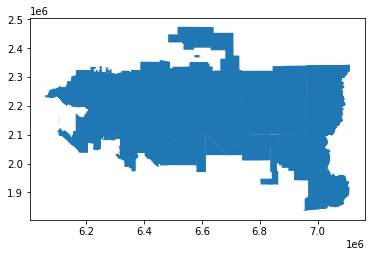

In [44]:
riverside.plot()

<AxesSubplot:>

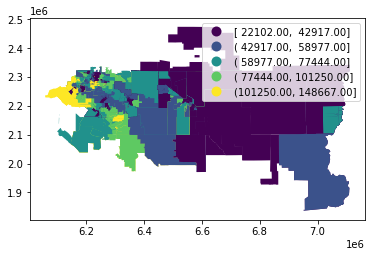

In [45]:
riverside.plot(column='median_household_income', scheme='FisherJenks', k=5, legend=True)

# import school district data 